# Лабораторная работа №2
## Статистическое моделирование случайных величин.<br>Интервальное оценивание параметров распределения случайных величин.

# Вариант 2
<b> (a, σ²) = (-1; 5) </b></br>
<b> γ = 0.95 </b></br>
<b> n = 11 </b></br>
<b> M = 2500 </b></br>
<b> K = 100 </b></br>
<b> Случайная величина Z </b></br>
<image src="image.png" width=150></br>
<b> Случайная величина W </b></br>
<image src="image-1.png" width=150>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import scipy.stats as st

A = -1
S = np.sqrt(5)
N = 11
GAMMA = 0.95
ALPHA = 0.05
K = 100


# Часть I

    1. Смоделировать выборку из n независимых наблюдений над случайной величиной X, 
    имеющей нормальный закон распределения с параметрами (a, σ²).


In [3]:
#np.random.seed(10)
X = np.random.normal(A, S, N)
dfX = pd.DataFrame(X)
print(dfX)

           0
0   0.654454
1  -3.163658
2   0.826968
3  -3.801707
4   2.397898
5  -1.558396
6  -0.261462
7  -0.903330
8  -1.142864
9  -3.647827
10 -0.635791


    1.1. С надежностью γ найти интервальную оценку (доверительный интервал) для
    математического ожидания случайной величины X, предполагая, что дисперсия
    случайной величины X известна. Итервальные оценки найти двумя способами.
    Первый способ заключается в программной реализации формул для вычисления границ
    интервальной оценки, а второй — в использовании метода interval из модуля
    статистических функций scipy.stats 


In [4]:

#* Вычисление среднего
X_mean = np.mean(X)

#* Вычисление стандартной ошибки
standard_error = S / np.sqrt(N)

#* Критическое значение для нормального распределения
z_critical = st.norm.ppf((1+GAMMA)/2)

#* Границы доверительного интервала
margin_of_error = z_critical * standard_error
a_left = X_mean - margin_of_error
a_right = X_mean + margin_of_error
confidence_interval = (a_left, a_right)

print("Выборка: ")
print(dfX)
print("\nСреднее: ")
print(X_mean)
print("\nДоверительный интервал: ")
print(confidence_interval)

Выборка: 
           0
0   0.654454
1  -3.163658
2   0.826968
3  -3.801707
4   2.397898
5  -1.558396
6  -0.261462
7  -0.903330
8  -1.142864
9  -3.647827
10 -0.635791

Среднее: 
-1.021428648530918

Доверительный интервал: 
(-2.3428360973407303, 0.29997880027889434)


In [5]:

#* Использование метода interval из модуля scipy.stats
confidence_interval = st.norm.interval(GAMMA, loc=X_mean, scale=standard_error)
print("Доверительный интервал используя метод interval: ")
print(confidence_interval)

Доверительный интервал используя метод interval: 
(-2.3428360973407303, 0.29997880027889434)


    1.2. С надежностью γ найти интервальную оценку (доверительный интервал) для
    математического ожидания случайной величины X, предполагая, что дисперсия
    случайной величины X неизвестна. Итервальные оценки найти двумя способами.
    Первый способ заключается в программной реализации формул для вычисления границ
    интервальной оценки, а второй — в использовании метода interval из модуля
    статистических функций scipy.stats

In [6]:

#* Cтандартное отклонение выборки
sigma_estimate = np.std(X, ddof=1)  #? ddof=1 для несмещенной оценки

#* Критическое значение t
t_critical = st.t.ppf((1 + GAMMA)/2, df=N-1)
print("Критическое значение: ")
print(t_critical)

#* Границы доверительного интервала
margin_of_error = t_critical * (sigma_estimate / np.sqrt(N))
a_left = X_mean - margin_of_error
a_right = X_mean + margin_of_error
confidence_interval = (a_left, a_right)

print("\nДоверительный интервал: ")
print(confidence_interval)

Критическое значение: 
2.2281388519649385

Доверительный интервал: 
(-2.3340775009866186, 0.29122020392478243)


In [7]:

#* Использование метода interval из модуля scipy.stats
confidence_interval_scipy = st.t.interval(GAMMA, df=N-1, loc=X_mean, scale=sigma_estimate / np.sqrt(N))
print("Доверительный интервал используя метод interval: ")
print(confidence_interval)

Доверительный интервал используя метод interval: 
(-2.3340775009866186, 0.29122020392478243)


    1.3. С надежностью γ найти интервальную оценку (доверительный интервал) для
    дисперсии случайной величины X.

In [8]:

#* Вычисление выборочной дисперсии
X_variance = np.var(X, ddof=1)  #? Используем ddof=1 для несмещенной оценки

#* Критические значения хи-квадрат
chi2_left = st.chi2.ppf( (1 - GAMMA) / 2, df=N-1 )
chi2_right = st.chi2.ppf( (1 + GAMMA) / 2, df=N-1 )

#* Границы доверительного интервала для дисперсии
a_left = (N - 1) * X_variance / chi2_right
a_right = (N - 1) * X_variance / chi2_left

#* Доверрительный интервал для дисперсии
confidence_interval_variance = (a_left, a_right)

print("Выборочная дисперсии: ", X_variance)

print("Критические значения хи-квадрат: ")
print((chi2_left, chi2_right))

print("Доверрительный интервал для дисперсии: ")
print(confidence_interval_variance)


Выборочная дисперсии:  3.8177308612825827
Критические значения хи-квадрат: 
(3.246972780236842, 20.483177350807388)
Доверрительный интервал для дисперсии: 
(1.8638372337932712, 11.757816032581918)


    2. Построить график зависимости длины доверительного интервала от надежности при
    неизменном объеме выборки для случаев интервального оценивания математического
    ожидания и дисперсии. 

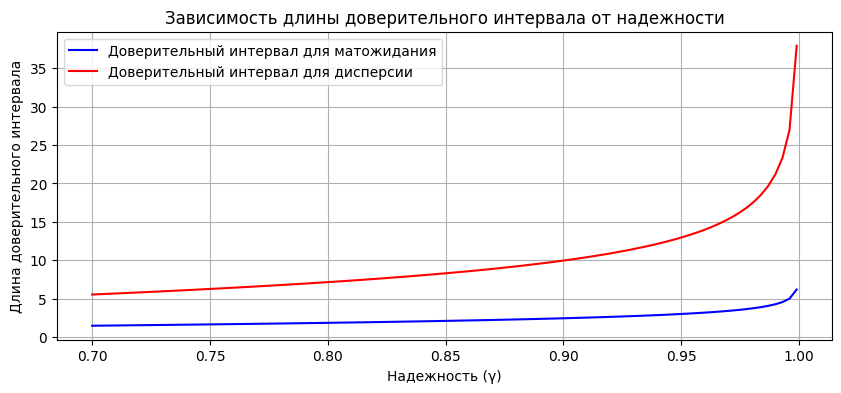

In [9]:
gamma_values = np.linspace(0.70, 0.999, 100)  #? Уровни надежности

#* Длины доверительных интервалов для математического ожидания и дисперсии
lengths_mean = []
lengths_variance = []

for gamma in gamma_values:
    #* Доверительный интервал для математического ожидания
    t_critical = st.t.ppf((1 + gamma) / 2, df=N - 1)  #? Критическое значение t
    margin_of_error_mean = t_critical * (S / np.sqrt(N))
    lengths_mean.append(2 * margin_of_error_mean)  #? Длина интервала

    #* Доверительный интервал для дисперсии
    chi2_lower = st.chi2.ppf((1 - gamma) / 2, df=N - 1)
    chi2_upper = st.chi2.ppf((1 + gamma) / 2, df=N - 1)
    lower_bound = (N - 1) * (S ** 2) / chi2_upper
    upper_bound = (N - 1) * (S ** 2) / chi2_lower
    lengths_variance.append(upper_bound - lower_bound)  #? Длина интервала

#* Построение графика
plt.figure(figsize=(10, 4))
plt.plot(gamma_values, lengths_mean, label='Доверительный интервал для матожидания', color='blue')
plt.plot(gamma_values, lengths_variance, label='Доверительный интервал для дисперсии', color='red')
plt.title('Зависимость длины доверительного интервала от надежности')
plt.xlabel('Надежность (γ)')
plt.ylabel('Длина доверительного интервала')
plt.legend()
plt.grid()
plt.show()

    3. Построить график зависимости длины доверительного интервала от объема выборки при
    неизменной надежности для случаев интервального оценивания математического
    ожидания и дисперсии.

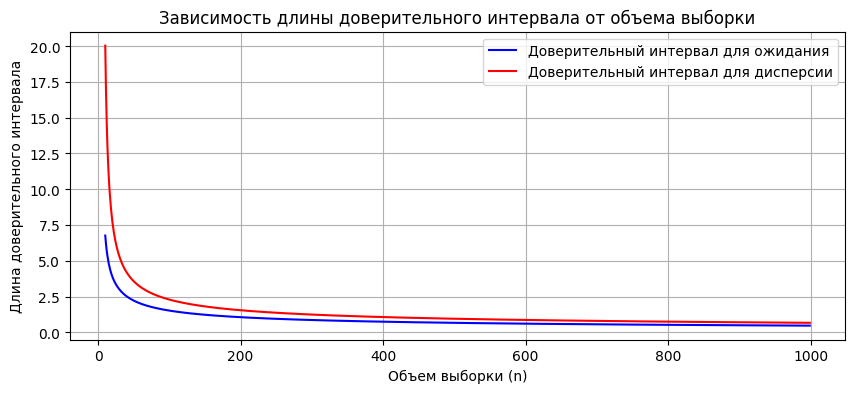

In [10]:
sizes = range(10, 1000)

#* Длины доверительных интервалов для математического ожидания
lengths_mean = []
lengths_variance = []

for n in sizes:
    #* Доверительный интервал для математического ожидания
    t_critical = st.t.ppf((1 + gamma) / 2, df=n - 1)  # Критическое значение t
    margin_of_error_mean = t_critical * (S / np.sqrt(n))
    lengths_mean.append(2 * margin_of_error_mean)  # Длина интервала

    #* Доверительный интервал для дисперсии
    chi2_lower = st.chi2.ppf((1 - gamma) / 2, df=n - 1)
    chi2_upper = st.chi2.ppf((1 + gamma) / 2, df=n - 1)
    lower_bound = (n - 1) * (S) / chi2_upper
    upper_bound = (n - 1) * (S) / chi2_lower
    lengths_variance.append(upper_bound - lower_bound)  # Длина интервала

#* Построение графика
plt.figure(figsize=(10, 4))
plt.plot(sizes, lengths_mean, label='Доверительный интервал для ожидания', color='blue')
plt.plot(sizes, lengths_variance, label='Доверительный интервал для дисперсии', color='red')
plt.title('Зависимость длины доверительного интервала от объема выборки')
plt.xlabel('Объем выборки (n)')
plt.ylabel('Длина доверительного интервала')
plt.legend()
plt.grid()
plt.show()


    4. Смоделировать M выборок из n значений нормально распределенной случайной
    величины X с параметрами (a, σ²). По каждой из M выборок с надежностью γ найти
    интервальную оценку (доверительный интервал) для математического ожидания случайной
    величины X, предполагая, что дисперсия случайной величины X неизвестна.

In [11]:
M = 2500

#* Массив для хранения доверительных интервалов
confidence_intervals = []
np.random.seed(None)
#* Генерация выборок и вычисление доверительных интервалов
for _ in range(M):   

    X = np.random.normal(A, S, N)  # Генерация выборки
    X_mean = np.mean(X)  # Среднее выборки
    X_std = np.std(X, ddof=1)  # Стандартное отклонение выборки (с поправкой на выборку)
    
    #* Критическое значение t
    t_critical = st.t.ppf((1 + GAMMA) / 2, df=N - 1)
    
    #* Длина доверительного интервала
    margin_of_error = t_critical * (X_std / np.sqrt(N))
    
    # *Доверительный интервал
    lower_bound = X_mean - margin_of_error
    upper_bound = X_mean + margin_of_error
    
    confidence_intervals.append((lower_bound, upper_bound))


for i, (lower, upper) in enumerate(confidence_intervals[:10]):
    print(f"Выборка {i + 1}: Доверительный интервал = ({lower:.8f}, {upper:.8f})")
    

Выборка 1: Доверительный интервал = (-0.87547500, 2.03144215)
Выборка 2: Доверительный интервал = (-1.13475033, 1.23136118)
Выборка 3: Доверительный интервал = (-2.23399653, -0.29708792)
Выборка 4: Доверительный интервал = (-2.15476532, 0.57599807)
Выборка 5: Доверительный интервал = (-1.80061604, 0.82684843)
Выборка 6: Доверительный интервал = (-2.67865410, -0.24930076)
Выборка 7: Доверительный интервал = (-1.73869476, 0.72346452)
Выборка 8: Доверительный интервал = (-2.67299976, -0.06562669)
Выборка 9: Доверительный интервал = (-3.18764404, -0.04596293)
Выборка 10: Доверительный интервал = (-2.33810760, -0.53703787)


По результатам моделирования найти точечную оценку γ* надежности γ.

In [12]:

#* Счетчик успешных выборок
success_count = 0  

#* Проверка, попадает ли истинное значение в доверительный интервал
for a_left, a_right in confidence_intervals:

    if a_left <= A <= a_right:
        success_count += 1

#* Расчет точечной оценки надежности γ*
gamma_star = success_count / M
print(f"Точечная оценка надежности γ*: {gamma_star:.6f}")

Точечная оценка надежности γ*: 0.952800


    5. Смоделировать M выборок из n значений нормально распределенной случайной
    величины X с параметрами (a, σ²).

In [13]:

#* Генерация выборок
Xs = np.random.normal(A, S, (M, N))

#* Пример вывода первых 5 выборок
for i in range(5):
    print(f"Выборка {i + 1}: {Xs[i]}")

Выборка 1: [ 0.08399908 -5.49455095  1.72717399 -2.49435312 -0.05718893  3.09175276
 -4.08639225  0.80206476  0.37097283  0.39740348 -4.41885223]
Выборка 2: [-2.54793808  1.75572462 -7.69002446 -2.45974822 -0.02908569 -1.76284083
 -0.80223483 -0.90878383 -1.29496656 -5.56280615 -1.87807244]
Выборка 3: [-0.89405586  0.9182883  -0.22492264 -3.17048757 -2.65548755  3.19005492
 -0.10143924 -1.01495848  1.6538802   0.64909812  1.17803501]
Выборка 4: [-0.95401587 -0.87574655 -1.39921995 -0.31486837  2.28631088 -1.38324145
  1.5828433  -2.33585426 -1.46714005 -0.85508324 -0.14092708]
Выборка 5: [ 0.77368176 -3.10471659 -4.13347458  1.8744105  -1.16109801  0.00911262
 -2.89278663 -1.7532535   1.96733717  0.64661149 -2.40554916]


    5.1. По каждой из M выборок найти наблюдаемое значение случайной величины Z.

In [14]:
#* Вычисляем сигму в квадрате (дисперсия) 
sigma_squared = S ** 2 
#* Вычисление Z для каждой выборки 
Z_values = [] 
 
for X in Xs: 
    X_bar = np.mean(X) #? Выборочное среднее 
    S_sample = np.std(X, ddof=1) # Стандартное отклонение выборки (с поправкой) 
    Z = (X_bar - A) / S_sample * np.sqrt(N) # Вычисление Z 
    Z_values.append(Z) 
 
#* Пример вывода первых 10 значений Z 
for i in range(10): 
    print(f"Z для выборки {i + 1}: {Z_values[i]}")

Z для выборки 1: 0.10025361271913921
Z для выборки 2: -1.422710210645069
Z для выборки 3: 1.708056518119513
Z для выборки 4: 1.1363730821737723
Z для выборки 5: 0.11753050002820291
Z для выборки 6: 0.31299156724427396
Z для выборки 7: -0.6720832924058288
Z для выборки 8: 0.08492677509114756
Z для выборки 9: 0.008998641124474136
Z для выборки 10: -0.06440020369397266


    5.2. По выборке из M значений случайной величины Z найти выборочные числовые
    характеристики ее распределения.

In [18]:
Z_values = np.random.normal(A, S, M)  #? Генерация случайных значений Z для примера

#* Вычисление выборочных характеристик
mean_Z = np.mean(Z_values)  #? Выборочное среднее
variance_Z = np.var(Z_values, ddof=1)  #? Выборочная дисперсия
std_dev_Z = np.std(Z_values, ddof=1)  #? Выборочное стандартное отклонение
min_Z = np.min(Z_values)  #? Минимальное значение
max_Z = np.max(Z_values)  #? Максимальное значение
quartiles_Z = np.percentile(Z_values, [25, 50, 75])  #? Квартильные значения

#* Вывод результатов
print(f"Выборочное среднее Z: {mean_Z}")
print(f"Выборочная дисперсия Z: {variance_Z}")
print(f"Выборочное стандартное отклонение Z: {std_dev_Z}")
print(f"Минимальное значение Z: {min_Z}")
print(f"Максимальное значение Z: {max_Z}")
print(f"Квартильные значения Z (25%, 50%, 75%): {quartiles_Z}")

Выборочное среднее Z: -0.9928466561538136
Выборочная дисперсия Z: 5.177587400620411
Выборочное стандартное отклонение Z: 2.27543125596455
Минимальное значение Z: -9.004229798075656
Максимальное значение Z: 7.942305965916541
Квартильные значения Z (25%, 50%, 75%): [-2.52826082 -1.01446158  0.50259595]


    5.3. Построить гистограмму относительных частот и теоретическую кривую распределения
    случайной величины Z, а также ящичковую диаграмму.

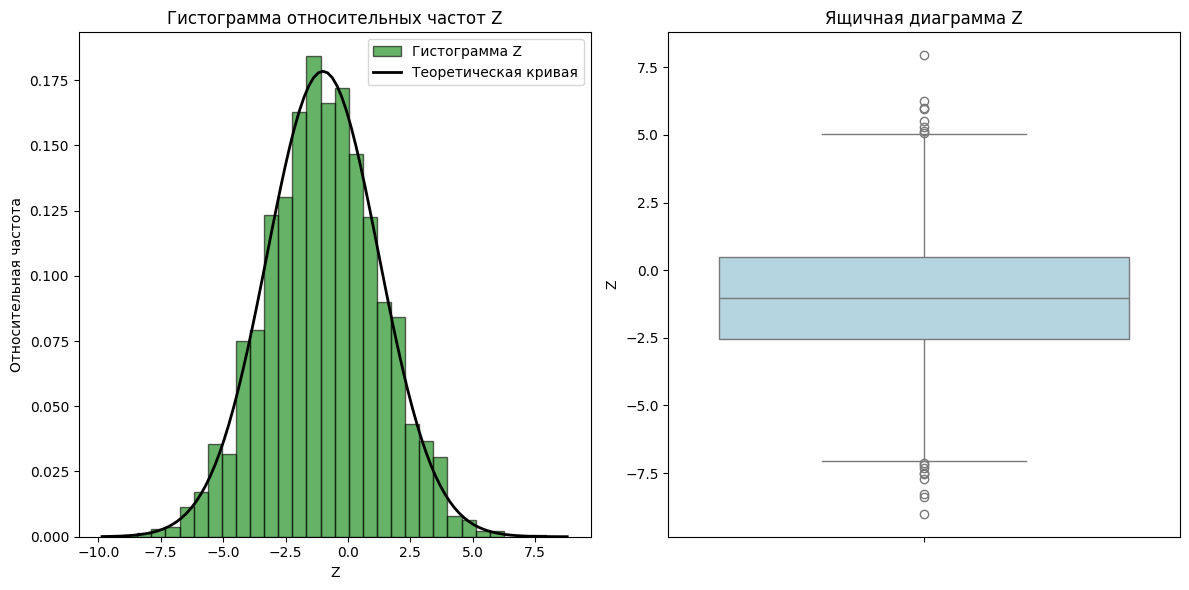

Количество реальных выбросов: 17
Ожидаемое количество выбросов: 25.0


In [19]:
import seaborn as sb

#* Построение гистограммы относительных частот
plt.figure(figsize=(12, 6))

#* Гистограмма
plt.subplot(1, 2, 1)
plt.hist(Z_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label='Гистограмма Z')
plt.title('Гистограмма относительных частот Z')
plt.xlabel('Z')
plt.ylabel('Относительная частота')

#* Теоретическая кривая распределения
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = st.norm.pdf(x, A, S)  # Параметры нормального распределения: mu=0, sigma=1
plt.plot(x, p, 'k', linewidth=2, label='Теоретическая кривая')
plt.legend()

#* Ящичная диаграмма
plt.subplot(1, 2, 2)
sb.boxplot(data=Z_values, color='lightblue')
plt.title('Ящичная диаграмма Z')
plt.ylabel('Z')

#* Отображение графиков
plt.tight_layout()
plt.show()

#* Вычисление квартилей
Q1 = np.percentile(Z_values, 25)
Q3 = np.percentile(Z_values, 75)
IQR = Q3 - Q1

#* Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#* Подсчет реальных выбросов
real_outliers = Z_values[(Z_values < lower_bound) | (Z_values > upper_bound)]
num_real_outliers = len(real_outliers)

#* Ожидаемое количество выбросов (1% от общего числа)
expected_outliers = 0.01 * len(Z_values)

print(f"Количество реальных выбросов: {num_real_outliers}")
print(f"Ожидаемое количество выбросов: {expected_outliers}")